## 0) IMPRIMO DATOS

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##  1) EXPLORACION Y LIMPIEZA DE DATOS

### 1.0) datos explorados

In [4]:
def explore_data(df):
    df(info)
print (df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
def explore_data(df):
    df.info()
    print(df.shape)
    return df

In [6]:
explore_data (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.1) quito duplicados

In [7]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

### 1.2) quito variables irrelevantes 

 considero que irrelevantes son SkinThicknes y Insulin porque tienen valores faltantes y pueden ser menos predictivas

## 2) ANÁLISIS DE VARIABLES UNIVARIANTE

### 2.1) Variables categóricas

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep=",")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    print("no hay variables categóricas")
else: 
    num_categorical = len(categorical_cols)
    num_rows = (num_categorical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
    for i in range(num_categorical, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

no hay variables categóricas


### 2.2) Variables numéricas

Mi variable target es OUTCOME que es el rtado (si tieen o no diabetes)

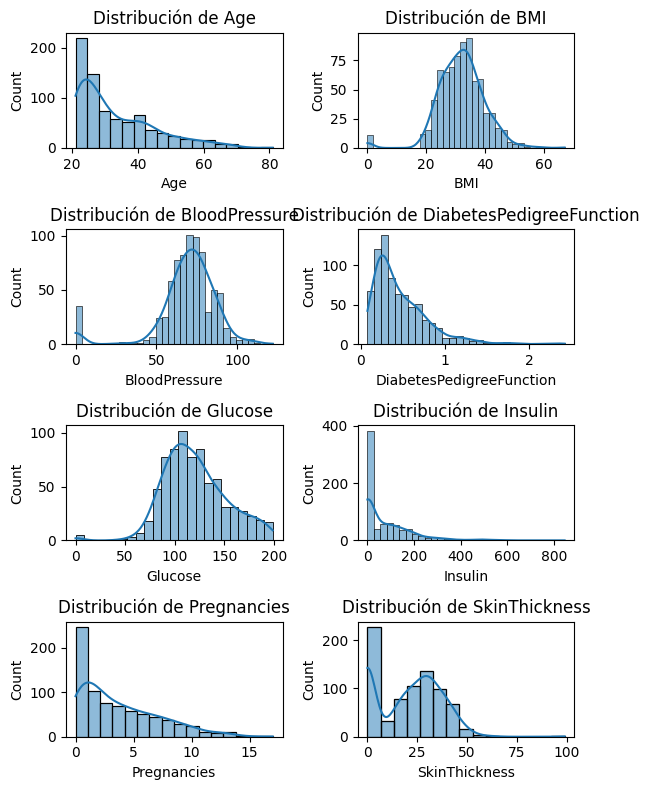

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
def univariate_numerical_analysis(df, target_column):
    if df[target_column].dtype == 'object':
        df[target_column + '_n'] = pd.factorize(df[target_column])[0]
        transformation_rules = {row[target_column]: row[target_column + '_n'] for _, row in df[[target_column, target_column + '_n']].drop_duplicates().iterrows()}
        ruta_json = os.path.join("../data/processed/Json", f"{target_column}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True)
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        target_column = target_column + '_n'
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_numerical = len(numerical_cols)
    num_rows = (num_numerical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 2 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.histplot(x=col, data=df, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        if i + num_numerical < len(axes):
            sns.boxplot(y=col, data=df, ax=axes[i + num_numerical])
            axes[i + num_numerical].set_title(f'Boxplot de {col}')
    for i in range(num_numerical * 2, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
target_column = 'Outcome'
univariate_numerical_analysis(df, target_column)

Pregnancies:Distribución: La mayoría de los pacientes tienen entre 0 y 5 embarazos, con algunos casos extremos de hasta 17 embarazos.
Conclusión: La variable tiene una distribución sesgada hacia valores bajos, lo que podría indicar que la mayoría de los pacientes son jóvenes o tienen pocos embarazos.

Glucose:Distribución: La concentración de glucosa muestra una distribución sesgada hacia valores altos, con un pico alrededor de 120-140 mg/dL.
Conclusión: La mayoría de los pacientes tienen niveles elevados de glucosa, lo cual es esperado en un estudio sobre diabetes.

BloodPressure: Distribución: La presión arterial diastólica tiene una distribución relativamente normal, con un pico alrededor de 70-80 mm Hg.
Conclusión: La presión arterial de los pacientes parece estar dentro de un rango saludable, aunque hay algunos valores extremos.

SkinThickness: Distribución: El grosor del pliegue cutáneo muestra una distribución sesgada hacia valores bajos, con muchos pacientes teniendo valores alrededor de 20 mm.
Conclusión: Esta variable podría tener muchos valores faltantes o errores de medición, lo cual es común en estudios clínicos.

Insulin:Distribución: La insulina sérica muestra una distribución altamente sesgada, con muchos valores bajos y algunos valores extremadamente altos.
Conclusión: La variabilidad en los niveles de insulina podría indicar problemas en la medición o diferencias significativas entre los pacientes.

BMI:Distribución: El índice de masa corporal tiene una distribución relativamente normal, con un pico alrededor de 30.
Conclusión: La mayoría de los pacientes tienen un IMC elevado, lo cual es común en estudios sobre diabetes.

DiabetesPedigreeFunction:Distribución: La función de pedigrí de diabetes muestra una distribución sesgada hacia valores bajos, con la mayoría de los pacientes teniendo valores menores a 1.
Conclusión: Esta variable podría ser útil para identificar el riesgo genético de diabetes.

Age:Distribución: La edad de los pacientes tiene una distribución relativamente uniforme, con un pico alrededor de los 50 años.
Conclusión: La muestra incluye pacientes de una amplia gama de edades, lo cual es útil para un análisis completo.

## 3) ANÁLISIS DE VARIABLES MULTIVARIANTE

### 3.1) Análisis numérico - numérico

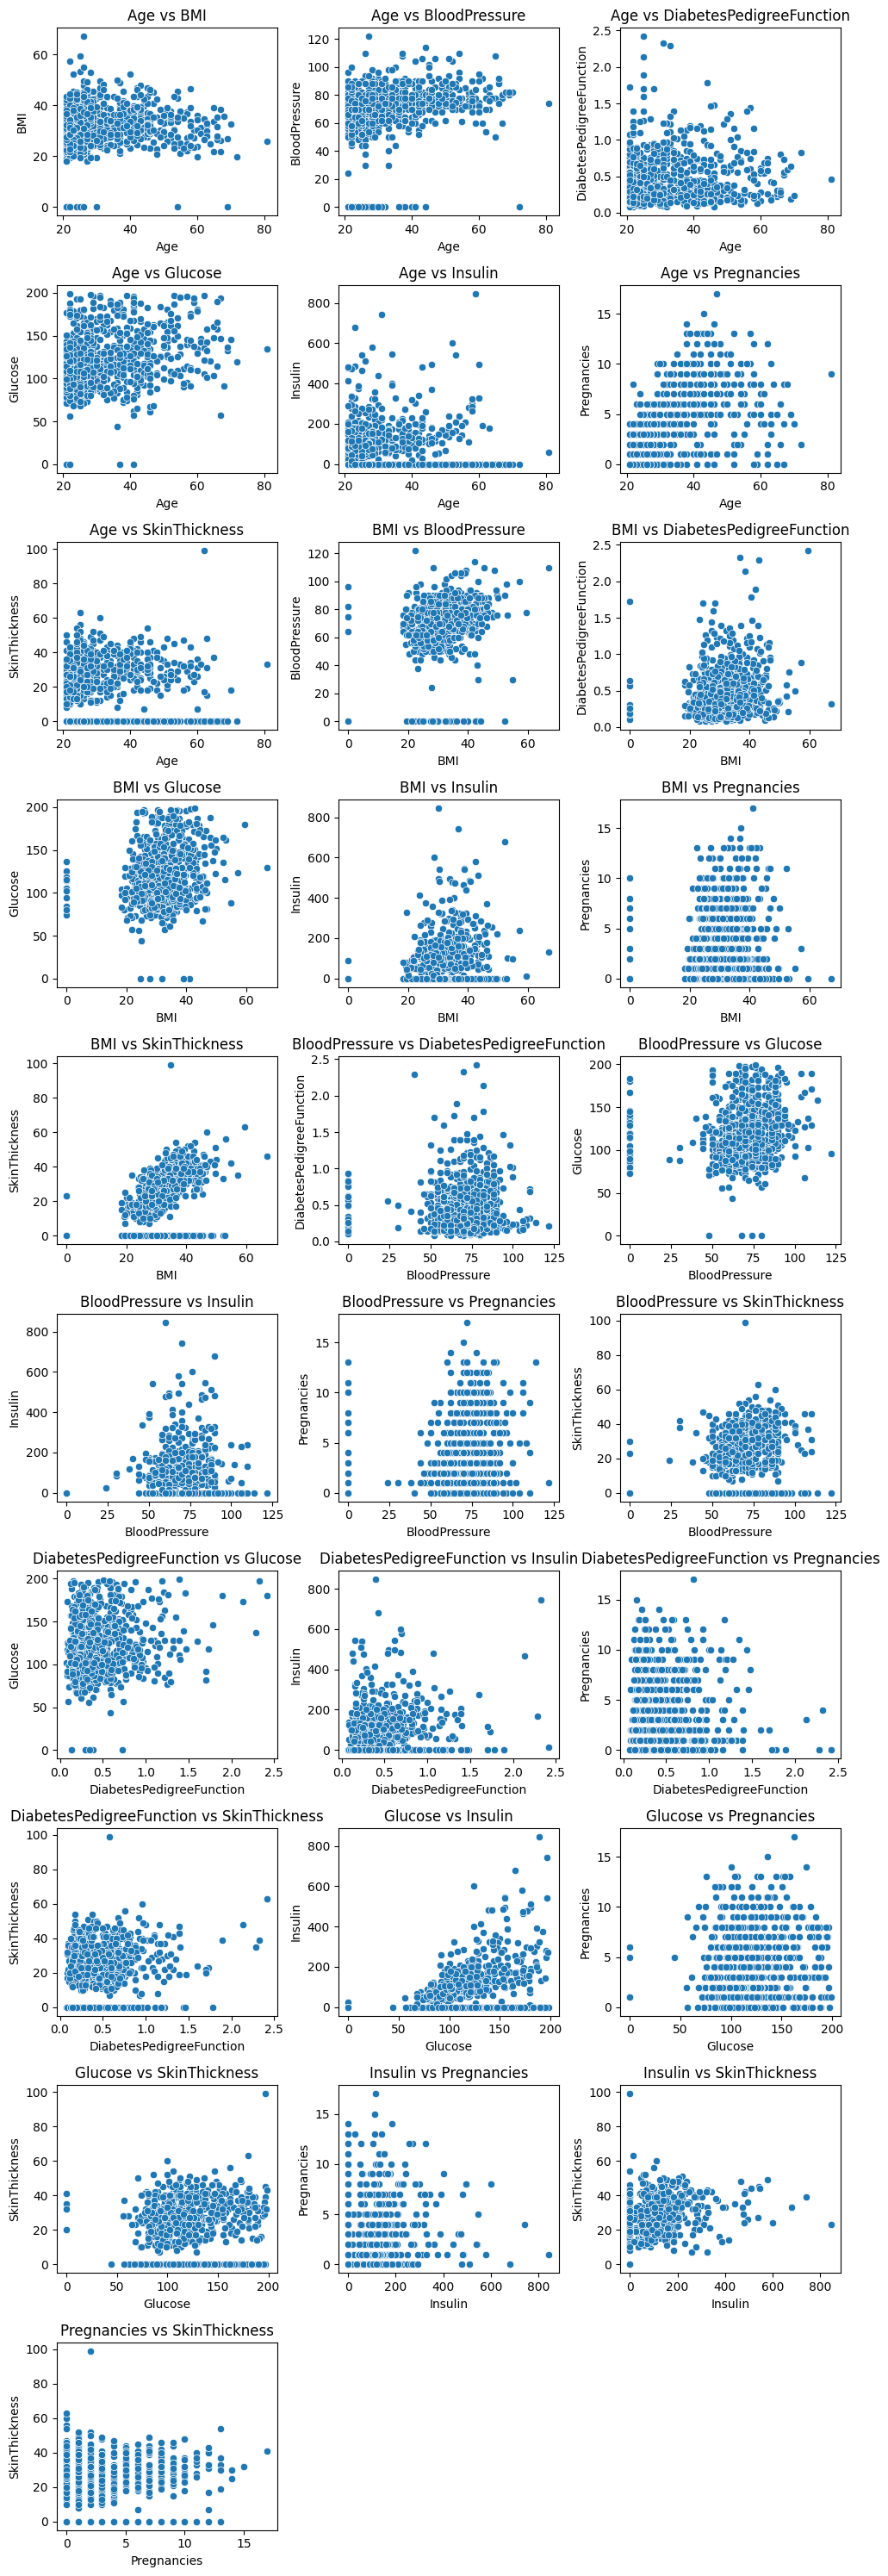

In [10]:
def bivariate_numerical_analysis(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) > 1:
        num_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2
        cols = 3
        rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
        axes = axes.flatten()
        plot_index = 0
        for i in range(len(numerical_cols)):
            for j in range(i + 1, len(numerical_cols)):
                ax = axes[plot_index]
                sns.scatterplot(x=numerical_cols[i], y=numerical_cols[j], data=df, ax=ax)
                ax.set_title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
                plot_index += 1
        for k in range(plot_index, len(axes)):
            fig.delaxes(axes[k])
        plt.tight_layout()
        plt.show()
bivariate_numerical_analysis(df)

CONCLUSIONES

1) Pregnancies vs Glucose: No hay relación clara entre embarazos y glucosa.
2) Pregnancies vs BloodPressure: Embarazos y presión arterial parecen independientes.
3) Pregnancies vs SkinThickness: No hay relación evidente entre embarazos y grosor del pliegue cutáneo.
4) Pregnancies vs Insulin: Embarazos y insulina parecen independientes.
5) Pregnancies vs BMI: No hay relación clara entre embarazos e IMC.
6) Pregnancies vs DiabetesPedigreeFunction: Embarazos y función de pedigrí parecen independientes.
7) Pregnancies vs Age: Relación débil entre embarazos y edad.
8) Glucose vs BloodPressure: Glucosa y presión arterial parecen independientes.
9) Glucose vs SkinThickness: No hay relación clara entre glucosa y grosor del pliegue cutáneo.
10) Glucose vs Insulin: Posible relación positiva entre glucosa e insulina.
11) Glucose vs BMI: Glucosa e IMC parecen independientes.
12) Glucose vs DiabetesPedigreeFunction: Glucosa y función de pedigrí parecen independientes.
13) Glucose vs Age: Glucosa y edad parecen independientes.
14) BloodPressure vs SkinThickness: Presión arterial y grosor del pliegue cutáneo parecen independientes.
15) BloodPressure vs Insulin: Presión arterial e insulina parecen independientes.
16) BloodPressure vs BMI: Presión arterial e IMC parecen independientes.
17) BloodPressure vs DiabetesPedigreeFunction: Presión arterial y función de pedigrí parecen independientes.
18) BloodPressure vs Age: Relación débil entre presión arterial y edad.
19) SkinThickness vs Insulin: Posible relación positiva entre grosor del pliegue cutáneo e insulina.
20) SkinThickness vs BMI: Posible relación positiva entre grosor del pliegue cutáneo e IMC.
21) SkinThickness vs DiabetesPedigreeFunction: Grosor del pliegue cutáneo y función de pedigrí parecen independientes.
22) SkinThickness vs Age: Grosor del pliegue cutáneo y edad parecen independientes.
23) Insulin vs BMI: Posible relación positiva entre insulina e IMC.
24) Insulin vs DiabetesPedigreeFunction: Insulina y función de pedigrí parecen independientes.
25) Insulin vs Age: Insulina y edad parecen independientes.
26) BMI vs DiabetesPedigreeFunction: IMC y función de pedigrí parecen independientes.
27) BMI vs Age: Relación débil entre IMC y edad.
28) DiabetesPedigreeFunction vs Age: Función de pedigrí y edad parecen independientes.


### 3.2) Análisis categórico - categórico

In [11]:
def bivariate_categorical_analysis(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) < 2:
        print("No hay suficientes variables categóricas en el DataFrame para realizar análisis bivariante.")
        return
    from itertools import combinations
    categorical_pairs = list(combinations(categorical_cols, 2))
    num_pairs = len(categorical_pairs)
    num_rows = (num_pairs + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6,3 * num_rows))
    axes = axes.flatten()
    for i, (col1, col2) in enumerate(categorical_pairs):
        sns.countplot(x=col1, hue=col2, data=df, ax=axes[i])
        axes[i].set_title(f'{col1} por {col2}')
    for i in range(num_pairs, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
bivariate_categorical_analysis(df)

No hay suficientes variables categóricas en el DataFrame para realizar análisis bivariante.


### 3.3 Combinaciones de la clase con varias predictoras


In [12]:
def class_predictor_analysis(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        categorical_col = categorical_cols[0]
        cols = 3
        rows = len(numerical_cols) // cols + (1 if len(numerical_cols) % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
        axes = axes.flatten()
        for plot_index, col in enumerate(numerical_cols):
            ax = axes[plot_index]
            sns.boxplot(x=categorical_col, y=col, data=df, ax=ax)
            ax.set_title(f'{col} por {categorical_col}')
        for i in range(plot_index + 1, len(axes)):
            fig.delaxes(axes[i])
        plt.tight_layout()
        plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos.")
class_predictor_analysis(df)

No hay suficientes columnas numéricas y/o categóricas para generar los gráficos.


### 3.4) Análisis de correlación

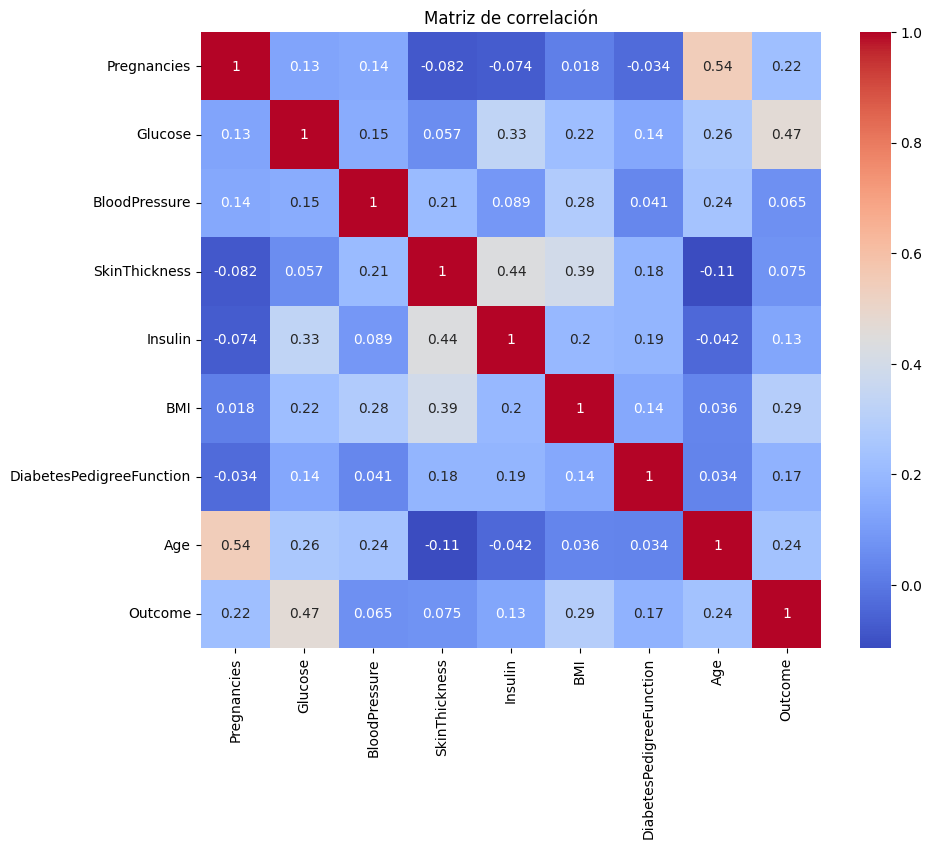

No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json
def correlation_analysis(df, categorical_to_numerical=None):
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()
def categorical_numerical_correlation(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            for numerical_col in numerical_cols:
                plt.figure(figsize=(5, 3))
                sns.boxplot(data=df, x=categorical_col, y=numerical_col)
                plt.title(f'{numerical_col} por {categorical_col}')
                plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")
categorical_to_numerical = [{'categorical_col': 'sex'}, {'categorical_col': 'smoker'}, {'categorical_col': 'region'}]
correlation_analysis(df, categorical_to_numerical)
categorical_numerical_correlation(df)

CONCLUSIONES: 

1. **Glucose vs Insulin**: Existe una correlación positiva moderada entre glucosa e insulina, lo que sugiere que niveles altos de glucosa suelen estar asociados con niveles altos de insulina.

2. **SkinThickness vs BMI**: Hay una correlación positiva fuerte entre el grosor del pliegue cutáneo y el índice de masa corporal, indicando que pacientes con mayor IMC tienden a tener mayor grosor del pliegue cutáneo.

3. **Age vs Pregnancies**: Existe una correlación positiva moderada entre edad y número de embarazos, lo que sugiere que pacientes mayores tienden a tener más embarazos.

4. **BloodPressure vs Age**: La correlación entre presión arterial y edad es débil, indicando que la presión arterial no varía significativamente con la edad en este conjunto de datos.

5. **Outcome vs Glucose**: Hay una correlación positiva moderada entre la variable objetivo (Outcome) y la glucosa, sugiriendo que niveles altos de glucosa están asociados con un mayor riesgo de diabetes.

6. **Outcome vs BMI**: Existe una correlación positiva moderada entre la variable objetivo (Outcome) y el índice de masa corporal, indicando que un mayor IMC está asociado con un mayor riesgo de diabetes.

7. **Outcome vs Age**: La correlación entre la variable objetivo (Outcome) y la edad es débil, lo que sugiere que la edad no es un predictor fuerte de diabetes en este conjunto de datos.

IMPORTANCIA DE LAS CARACTERISTICAS PARA VER QUE VARIABLES SE ELIMINAN DEL MODELO PORQUE NO SON RELEVANTES PARA EL MISMO

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)
threshold = 0.05
X_train_reduced = X_train.loc[:, feature_importances[feature_importances['Importance'] >= threshold]['Feature']]
X_test_reduced = X_test.loc[:, feature_importances[feature_importances['Importance'] >= threshold]['Feature']]
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, y_train)
accuracy = model_reduced.score(X_test_reduced, y_test)
print(f'Accuracy with reduced features: {accuracy}')

                    Feature  Importance
1                   Glucose    0.282089
5                       BMI    0.158120
7                       Age    0.142116
6  DiabetesPedigreeFunction    0.113127
2             BloodPressure    0.084052
0               Pregnancies    0.080552
3             SkinThickness    0.070559
4                   Insulin    0.069385
Accuracy with reduced features: 0.7748917748917749


### 3.5) Categórico - numérico

In [15]:
categorical_numerical_correlation(df)

No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.


## 4) ANÁLISIS DE TODAS EN UNA

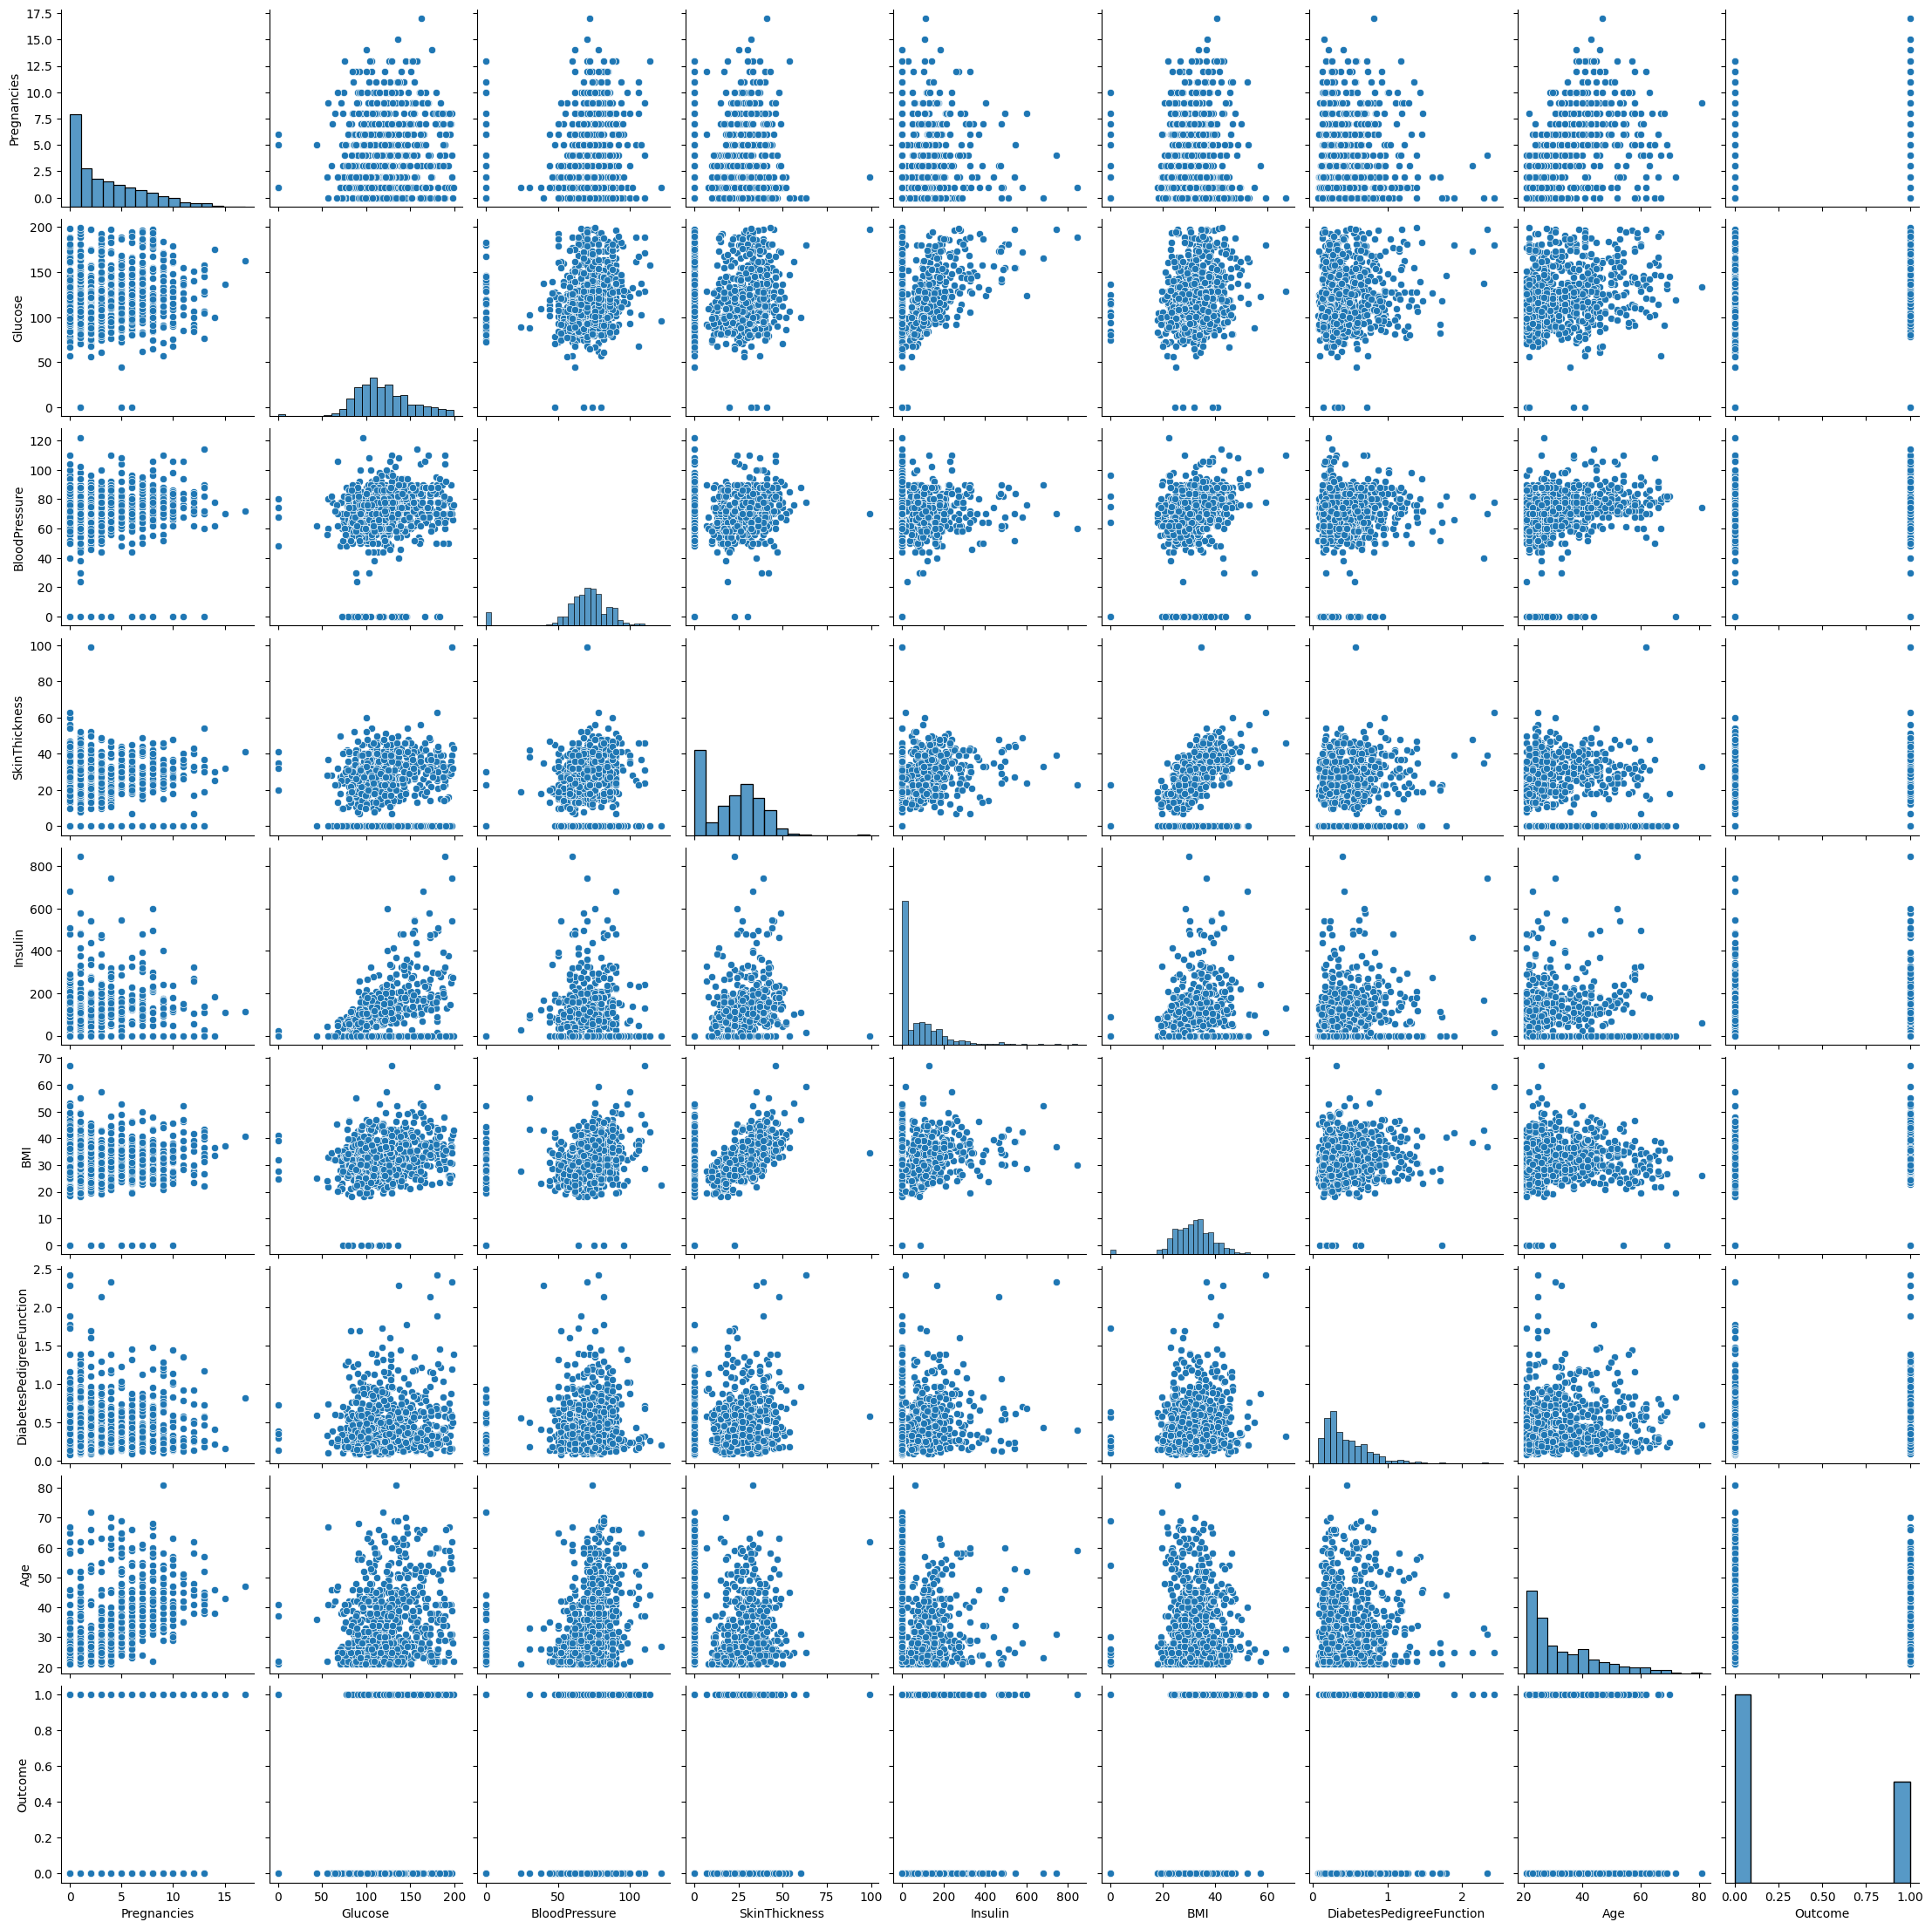

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
def pairplot_analysis(df):
	numerical_cols = df.select_dtypes(include=['number']).columns
	sns.pairplot(df[numerical_cols])
	plt.show()
pairplot_analysis(df)

## 5) FEATURE ENGINEERING


### 5.1) Análisis de outliers

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
def analyze_outliers(df):
    df_con_outliers = df.copy()
    df_sin_outliers = df.copy()
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_cols = len(numerical_cols)
    rows = (num_cols + 4) // 5
    fig, axes = plt.subplots(rows, 5, figsize=(10, 3 * rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.boxplot(ax=axes[i], data=df, y=col)
        axes[i].set_title(col)
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    return df_sin_outliers, numerical_cols

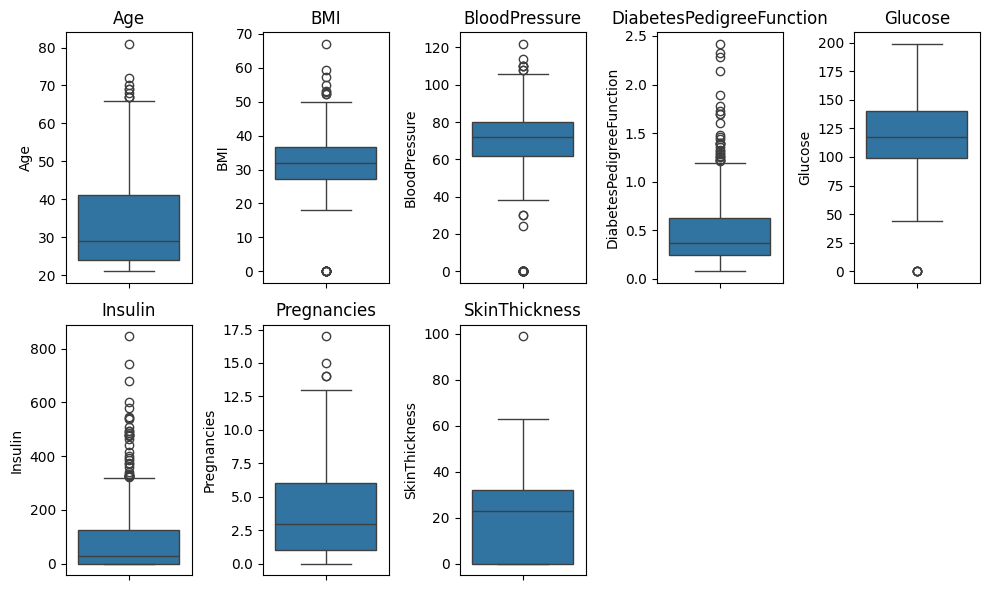

In [19]:
df_sin_outliers, numerical_cols = analyze_outliers(df)

In [20]:
def replace_outliers(df_sin_outliers, numerical_cols):
    """Reemplazar outliers."""
    def replace_outliers_column(column, df):
        colum_stats = df[column].describe()
        IQR = colum_stats["75%"] - colum_stats["25%"]
        lower_bound = colum_stats["25%"] - 1.5 * IQR
        upper_bound = colum_stats["75%"] + 1.5 * IQR
        if lower_bound < 0: lower_bound = min(df[column])
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
        return df.copy(), [lower_bound, upper_bound]
    outliers_dict = {}
    for column in numerical_cols:
        df_sin_outliers, limit_list = replace_outliers_column(column, df_sin_outliers)
        outliers_dict[column] = [float(limit) for limit in limit_list]
    ruta_json = os.path.join("../data/processed/Json", "outliers_dict.json")
    os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
    with open(ruta_json, "w") as f:
        json.dump(outliers_dict, f)
    print(outliers_dict)
    return df_sin_outliers

In [21]:
df_sin_outliers = replace_outliers(df_sin_outliers, numerical_cols)

{'Age': [21.0, 66.5], 'BMI': [13.35, 50.550000000000004], 'BloodPressure': [35.0, 107.0], 'DiabetesPedigreeFunction': [0.078, 1.2], 'Glucose': [37.125, 202.125], 'Insulin': [0.0, 318.125], 'Pregnancies': [0.0, 13.5], 'SkinThickness': [0.0, 80.0]}


### 5.2) Análisis de valores faltantes

In [22]:
def handle_missing_values(df_sin_outliers):
    """5.2 Análisis de valores faltantes."""
    print("Valores faltantes por columna:")
    print(df_sin_outliers.isnull().sum())
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df_sin_outliers.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].median())
    for col in categorical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].mode()[0])
    print("\nValores faltantes después de la imputación:")
    print(df_sin_outliers.isnull().sum())
    return df_sin_outliers

In [23]:
handle_missing_values(df_sin_outliers)

Valores faltantes por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valores faltantes después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


### 5.3) Inferencia de nuevas features

In [24]:
def infer_new_features(df_sin_outliers):
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) >= 2:
        for feature in inferencia:
            try:
                df_sin_outliers[feature['new_col_name']] = df_sin_outliers[feature['col1']] * df_sin_outliers[feature['col2']]
                print(f"Nueva característica '{feature['new_col_name']}' creada a partir de '{feature['col1']}' y '{feature['col2']}'.")
            except Exception as e:
                print(f"Error al crear la nueva característica '{feature['new_col_name']}': {e}")
    else:
        print("No hay columnas que apliquen para la inferencia.")
    return df_sin_outliers

In [25]:

# Define the inferencia variable with the columns to combine and the names of the new columns
inferencia = [
    {'col1': 'Glucose', 'col2': 'BMI', 'new_col_name': 'Glucose_BMI'},
    {'col1': 'Age', 'col2': 'Pregnancies', 'new_col_name': 'Age_Pregnancies'}
]

def infer_new_features(df_sin_outliers):
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) >= 2:
        for feature in inferencia:
            try:
                df_sin_outliers[feature['new_col_name']] = df_sin_outliers[feature['col1']] * df_sin_outliers[feature['col2']]
                print(f"Nueva característica '{feature['new_col_name']}' creada a partir de '{feature['col1']}' y '{feature['col2']}'.")
            except Exception as e:
                print(f"Error al crear la nueva característica '{feature['new_col_name']}': {e}")
    else:
        print("No hay columnas que apliquen para la inferencia.")
    return df_sin_outliers

df_sin_outliers = infer_new_features(df_sin_outliers)


Nueva característica 'Glucose_BMI' creada a partir de 'Glucose' y 'BMI'.
Nueva característica 'Age_Pregnancies' creada a partir de 'Age' y 'Pregnancies'.


## 6) FEATURE SCALING

### 6.1) ESCALADO

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_numerical = df[numerical_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)
df_scaled['Outcome'] = df['Outcome'].values
print(df_scaled.head())
ruta_csv = os.path.join("../data/processed", "scaled_data.csv")
df_scaled.to_csv(ruta_csv, index=False)
print(f"Datos escalados guardados en {ruta_csv}")

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  
Datos escalados guardados en ../data/processed\scaled_data.csv


### 6.2) SELECCION DE CARACTERISTICAS

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[numerical_cols]
y = df['Outcome']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
selector = SelectFromModel(model, prefit=True)
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print(f'Características seleccionadas: {selected_features}')
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['Outcome'] = y.values
print(df_selected.head())
ruta_csv = os.path.join("../data/processed", "selected_features_data.csv")
df_selected.to_csv(ruta_csv, index=False)
print(f"Datos con características seleccionadas guardados en {ruta_csv}")

Características seleccionadas: Index(['Glucose', 'BMI', 'Age'], dtype='object')
   Glucose   BMI   Age  Outcome
0    148.0  33.6  50.0        1
1     85.0  26.6  31.0        0
2    183.0  23.3  32.0        1
3     89.0  28.1  21.0        0
4    137.0  43.1  33.0        1
Datos con características seleccionadas guardados en ../data/processed\selected_features_data.csv


c:\Users\PilarHernández\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### 6.3) TRAIN Y TEST

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

X_train = train_data.drop(["Outcome"], axis=1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis=1)
y_test = test_data["Outcome"]

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7445887445887446

In [39]:
import os
import json
output_folder = "variables_json"
os.makedirs(output_folder, exist_ok=True)
for column in df_scaled.columns:
    variable_data = df_scaled[column].to_dict()  # Convertir la columna a un diccionario
    output_path = os.path.join(output_folder, f"{column}.json")
    with open(output_path, "w") as json_file:
        json.dump(variable_data, json_file)
print(f"Archivos JSON guardados en la carpeta: {output_folder}")

Archivos JSON guardados en la carpeta: variables_json


In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Save scalers to files
joblib.dump(standard_scaler, 'standard_scaler.pkl')
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')

# Load scalers from files
standard_scaler = joblib.load('standard_scaler.pkl')
minmax_scaler = joblib.load('minmax_scaler.pkl')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[numerical_cols]
y = df['Outcome']
X_sin_outliers = df_sin_outliers[numerical_cols]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sin_outliers, X_test_sin_outliers, _, _ = train_test_split(X_sin_outliers, y, test_size=0.3, random_state=42)
model_con_outliers = RandomForestClassifier(random_state=42)
model_con_outliers.fit(X_train_con_outliers, y_train)
y_pred_con_outliers = model_con_outliers.predict(X_test_con_outliers)
accuracy_con_outliers = accuracy_score(y_test, y_pred_con_outliers)
model_sin_outliers = RandomForestClassifier(random_state=42)
model_sin_outliers.fit(X_train_sin_outliers, y_train)
y_pred_sin_outliers = model_sin_outliers.predict(X_test_sin_outliers)
accuracy_sin_outliers = accuracy_score(y_test, y_pred_sin_outliers)
print(f'Precisión del modelo con outliers: {accuracy_con_outliers}')
print(f'Precisión del modelo sin outliers: {accuracy_sin_outliers}')

Precisión del modelo con outliers: 0.7532467532467533
Precisión del modelo sin outliers: 0.7445887445887446


In [43]:
# Define X_train_sel and X_test_sel by adding the target variable to the selected features
X_train_sel = X_train_reduced.copy()
X_test_sel = X_test_reduced.copy()
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

# Save the datasets to CSV files
X_train_sel.to_csv("X_train_sel.csv", index=False)
X_test_sel.to_csv("X_test_sel.csv", index=False)

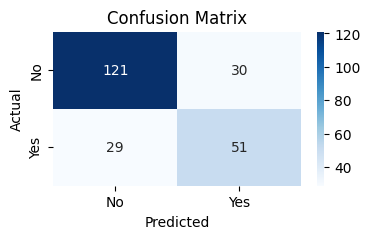

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import confusion_matrix
siono_cm = confusion_matrix(y_test, y_pred)
# dibujo la matriz
cm_df = pd.DataFrame(siono_cm, index=["No", "Yes"], columns=["No", "Yes"])
plt.figure(figsize=(4, 2))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

falso negativo y verdadero positivo = 121 veces dijo que no y acerto, y 51 veces dijo que si y acertó.

In [ ]:
from pickle import dump

dump(model, open("../models/ranfor_classifier_nestimators-60_42.sav", "wb"))